In [1]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_histogram
from qiskit import QuantumCircuit

# IBM Quantum Computer Error Correction

#### By: Kevin Lie-Atjam and Mihir Vemuri

### Description: What is Quantum Computing?

Quantum mechanics is the branch of physics that describes the behavior of matter and energy at a very small scale, such as atoms and subatomic particles. In the quantum world, particles can exist in multiple states at the same time, and can become "entangled" with each other, meaning that their states are connected in a way that is not possible in classical physics. While classical computers use bits, which can only exist in one of two states (either 0 or 1), quantum computers use quantum bits, or qubits, which can exist in a superposition of both states at the same time. Quantum computers use these principles to store and manipulate information in "qubits" instead of the "bits" used by classical computers. Qubits can exist in multiple states at once, allowing for many calculations to be performed simultaneously, and they can also become entangled with each other, enabling the computer to perform complex calculations much faster than classical computers.

This property of superposition allows quantum computers to perform certain computations much faster than classical computers. In addition, quantum computers can use entanglement, a phenomenon in which two particles become linked and share information regardless of their distance from each other, to perform computations that would be impossible for classical computers. Below is the famous "Schrodingers cat," as an conceptual example of particle superpsotion.

![Alt text](Pictures_for_Notebook/Schrodingers-Cat_0.jpg)

Quantum computing is still an emerging technology, and currently, only a few applications have been developed, such as quantum cryptography and quantum simulations. However, researchers are exploring the potential of quantum computing in many fields, including drug discovery, cryptography, and machine learning.

## Our Project and Quantum Error

IBM has an array of quantum computers and simulators(classical computers which essentially act like quantum computers), which have started exploring this incredibly new and untapped field. These computers are radically inventive, push the boundaries of quantum computing, and are easily accessible but can still be susceptible to Quantum error.

Quantum error refers to errors that can occur due to reasons such as decoherence, noise, and other environmental factors. These errors can cause a quantum computer to produce incorrect results, which can be problematic in practical applications ("Quantum Error Correction" by Daniel Gottesman). One approach to mitigating quantum error is through the use of error correction codes. These codes allow quantum computers to detect and correct errors that occur during computation, improving the reliability and accuracy of the results. There are several types of error correction codes used in quantum computing, including surface codes, color codes, and topological codes ("Quantum Error Correction for Beginners" by Martin Laforest.) These codes are designed to encode information in such a way that errors can be detected and corrected, while minimizing the number of physical qubits required. 

With each application of a quantum computer, there is an expected result. **Our program attempts to identify whether error correction is required at an output from one of IBMs qunatum computers by generating a random quantum circuit based on quantum logic gates, finding the expected value of this random circuit, and then comparing the expected value to the actual output from IBM's backend by using a chi-squared test, to test for statistical significance.** In the following document, we will walk through this process and see whether the difference between the collected data from IBM's Backend and the expected values from the random circuit are at all statistically significant.

## Random Circuit Function and the Quantum Logic Gates used 

This program is a Python implementation of a quantum circuit generator. It generates a randomized list of quantum gates and evaluates each gate within its specified parameters, such as random angle values and random qubit values.

The program has two main functions: random_circuit and evaluate_circuit. The random_circuit function generates a randomized list of quantum gates based on a specified depth parameter. The function uses a dictionary POTENTIAL_GATES to store the potential quantum gates that can be included in the final list. The depth parameter specifies the number of gates that will be included in the final list. The function selects a random gate from the dictionary and appends it to an empty list gatelist. It then recursively calls itself with depth - 1 until depth is 0. The final output of the function is the gatelist.

The evaluate_circuit function takes the random_gatelist output from the random_circuit function as its input. It then evaluates each gate within its specified parameters, such as random angle values and random qubit values. The function uses a QuantumCircuit object from Qiskit to create the quantum circuit with the randomly inputted values. The function also creates a list qubit_input_list to append each logic gate to and a dictionary counts that maps each qubit instance (00, 01, 10, 11) to the amount that each occurs in the random circuit.

The function iterates through each gate in the random_gatelist and evaluates the gate based on its specified parameters. It then appends the inputted parameters for each gate to the qubit_input_list and the evaluated gate to the QuantumCircuit object. The function uses Qiskit's execute method to run the circuit and obtain the counts. The final output of the function is the qubit_input_list, the QuantumCircuit object, and the counts dictionary.

It can be used to generate random quantum circuits for testing or visualization purposes.

In the POTENTIAL_GATES dictionary, we have defined 20 quantum gates that will be used in randomizing the path/gates in the random circuit. The defined gates are below.

1. QuantumCircuit.h: The Hadamard gate. It transforms the state of a qubit between the x and z bases, producing a superposition of 0 and 1.

2. QuantumCircuit.y: The Y gate. It is a qubit rotation through pi radians around the y axis.

3. QuantumCircuit.x: The X gate. It is a qubit rotation through pi radians around the x axis.

4. QuantumCircuit.z: The Z gate. It is a qubit rotation through pi radians around the z axis.

5. QuantumCircuit.p: The P gate (also known as the phase gate). It is parametrized and requires a number to tell it exactly what to perform. The P gate rotates the phase of a qubit by a specified angle in the direction of the Z-axis.

6. QuantumCircuit.s: The S gate (also known as the phase gate or Z90 gate). It represents a 90-degree rotation around the z-axis.

7. .sdg: The S-dagger gate. It is the inverse of the S gate.

8. QuantumCircuit.t: The T gate. It represents a 45-degree rotation around the z-axis.

9. QuantumCircuit.tdg: The T-dagger gate. It is the inverse of the T gate.

10. QuantumCircuit.cx: The controlled-NOT gate. It applies the NOT gate to the second qubit only when the first qubit is in the state |1>.

11. QuantumCircuit.swap: The SWAP gate. It swaps the states of two qubits.

12. QuantumCircuit.sx: The SX gate. It is a rotation around the x-axis by pi/2 followed by a NOT gate.

13. QuantumCircuit.sxdg: The SX-dagger gate. It is the inverse of the SX gate.

14. QuantumCircuit.rx: The X-rotation gate. It is a qubit rotation around the x-axis by a specified angle.

15. QuantumCircuit.ry: The Y-rotation gate. It is a qubit rotation around the y-axis by a specified angle.

16. QuantumCircuit.rz: The Z-rotation gate. It is a qubit rotation around the z-axis by a specified angle.

17. QuantumCircuit.rxx: The two-qubit XX-rotation gate. It is a rotation around the XX-axis by a specified angle.

18. QuantumCircuit.ryy: The two-qubit YY-rotation gate. It is a rotation around the YY-axis by a specified angle.

19. QuantumCircuit.rzz: The two-qubit ZZ-rotation gate. It is a rotation around the ZZ-axis by a specified angle.

20. QuantumCircuit.u: The U3 gate. It is a general single-qubit rotation gate that can be used to construct any single-qubit unitary. It is parametrized and requires three angles to specify the rotation.

In [3]:
from random_circuit import random_circuit,evaluate_circuit

# RANDOM_CIRCUIT IMPLEMENTATION
# Define a list of wanted input depths
depth_list = [1,2,3,5,7,10,20,50,100,200]
circuit_list= []
# Append each depth case to an overall list
for i in depth_list:
    circuit_list.append(random_circuit(i,[]))

# EVALUATE_CIRCUIT IMPLEMENTATION
evaluated_circuit_list = []
for i in circuit_list:
    evaluated_circuit_list.append(evaluate_circuit(i))




## Random Circuit Depth Vizualizations

Each circuit has its own associated gates that describe the different behaviors that a qubit will encounter.

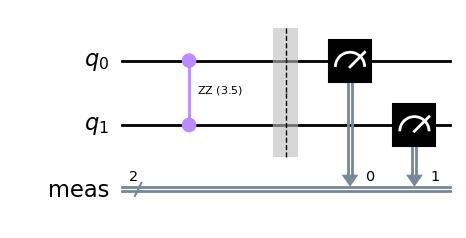

In [4]:
evaluated_circuit_list[0][1].draw(output="mpl")

For example, this shows a random circuit with a depth of 1 and 2 qubits. For each circuit, the two qubits can be represented as a Bloch Sphere. The Bloch Sphere gives a vector insight into what the liklihood of a specific quantum state the qubit will be in. For example, if the angle of the vector is closer to |0> on the z-axis, then that means that the qubit has a higher liklihood to be zero rather than 1. 

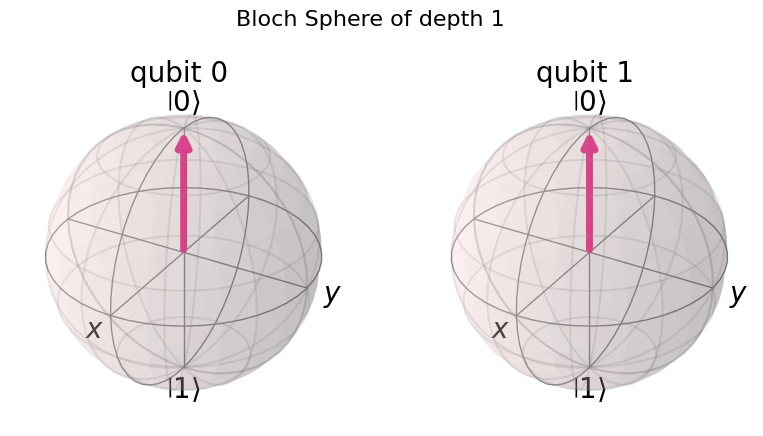

In [5]:
qc = QuantumCircuit(2)
for element in evaluated_circuit_list[0][0]:
    eval("qc" + element)

state = Statevector(qc)

plot_bloch_multivector(state,title="Bloch Sphere of depth 1")

In this instance, this gives a probabilistic representation of what each of the qubit outputs would be for a circuit of depth 1. However, the Bloch sphere vector orientation is defined by the statevector, a vector representation consisting of complex number that detail the probability of a given set of qubit states. Since we are working with two qubits, the vector has a length of 4 with the states 00, 01, 10, and 11 being listed respectively.

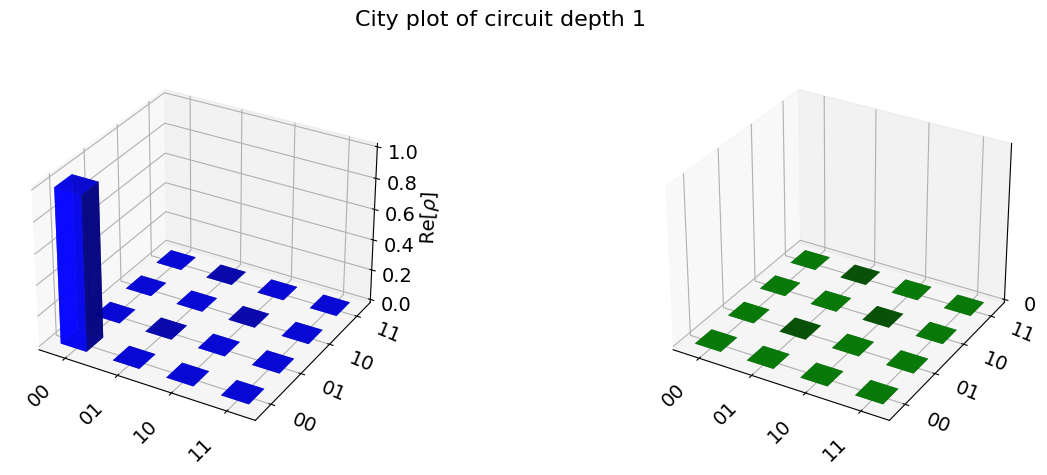

In [6]:
plot_state_city(state,alpha=0.8,title="City plot of circuit depth 1",color=["blue","green"])

This is would be the city plots for both the real and imaginary values of the state vector where the height represents the squarerooted value of the probability of a specific qubit instance. We will continue to show the respective Bloch sphere and city vector representation of what we expect the qubit readouts should be probabalistically. 

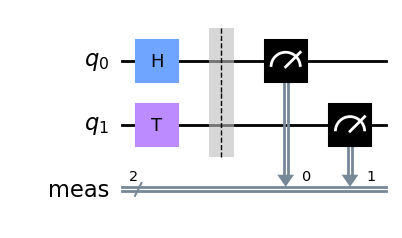

In [7]:
evaluated_circuit_list[1][1].draw(output="mpl")

This shows a random circuit with a depth of 2 and 2 qubits.

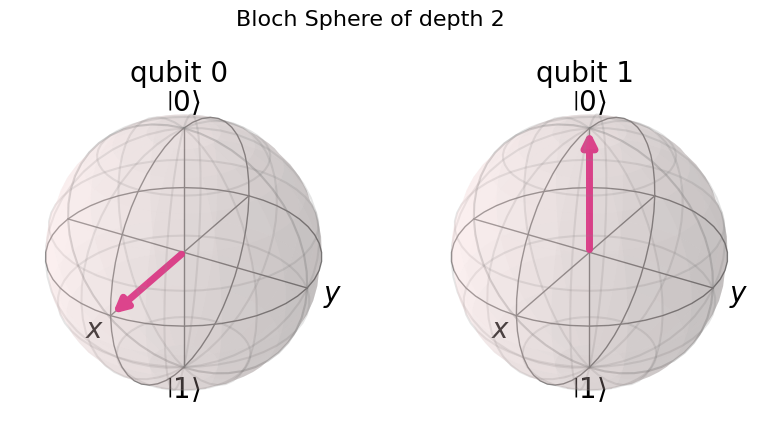

In [8]:
qc = QuantumCircuit(2)
for element in evaluated_circuit_list[1][0]:
    eval("qc" + element)

state = Statevector(qc)

plot_bloch_multivector(state,title="Bloch Sphere of depth 2")

This would be the Bloch spheres for the circuit depth of 2.

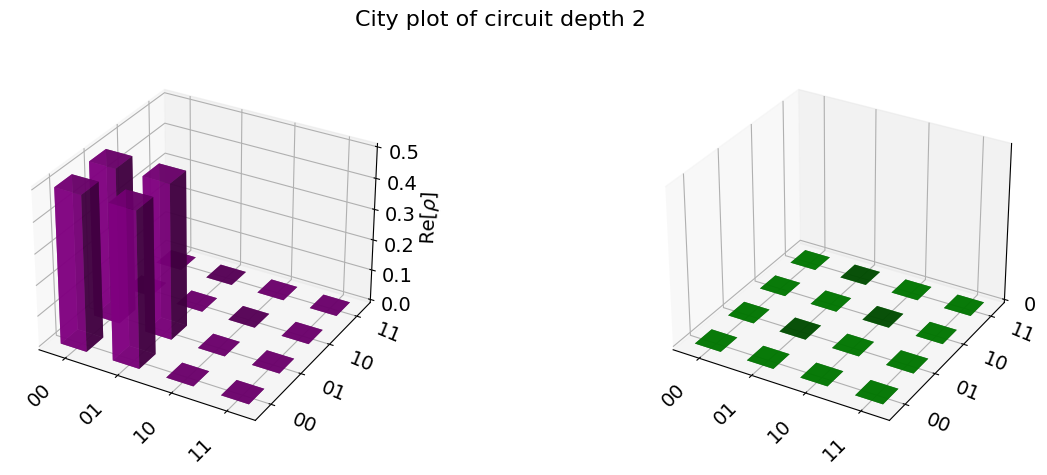

In [9]:
plot_state_city(state,alpha=0.8,title="City plot of circuit depth 2",color=["purple","green"])

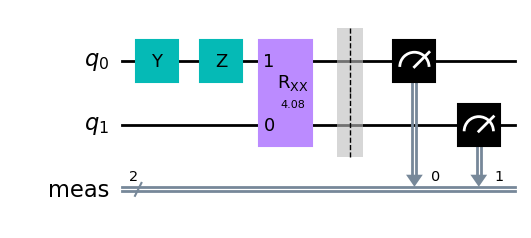

In [10]:
evaluated_circuit_list[2][1].draw(output="mpl")

This shows a random circuit with a depth of 3 and 2 qubits.

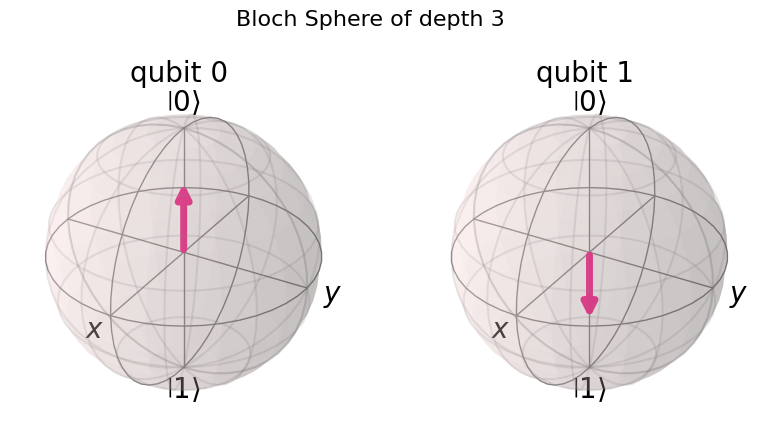

In [11]:
qc = QuantumCircuit(2)
for element in evaluated_circuit_list[2][0]:
    eval("qc" + element)

state = Statevector(qc)

plot_bloch_multivector(state,title="Bloch Sphere of depth 3")

This would be the Bloch sphere with a circuit depth of 3

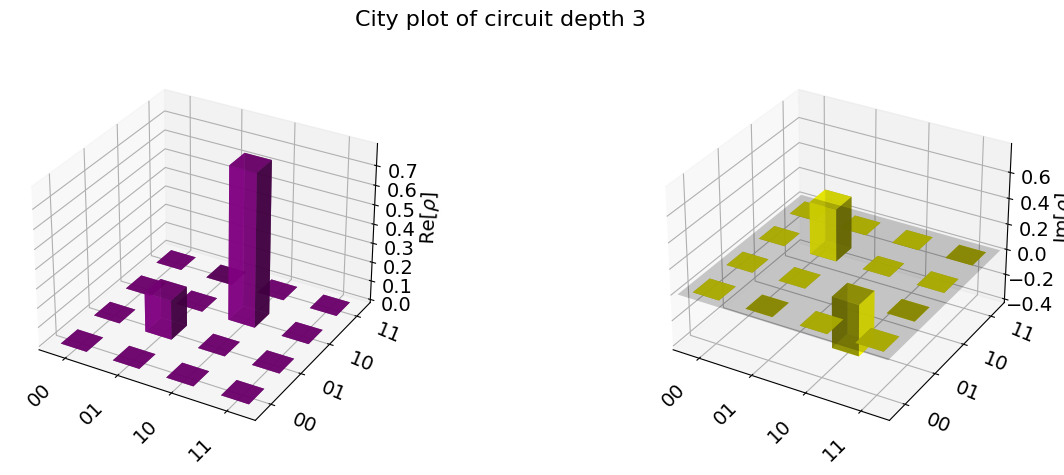

In [12]:
plot_state_city(state,alpha=0.8,title="City plot of circuit depth 3",color=["purple","yellow"])

Followed by the city diagram of depth 3

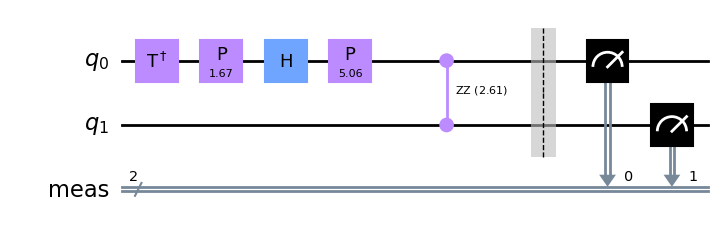

In [13]:
evaluated_circuit_list[3][1].draw(output="mpl")

This shows a random circuit with a depth of 5 and 2 qubits.

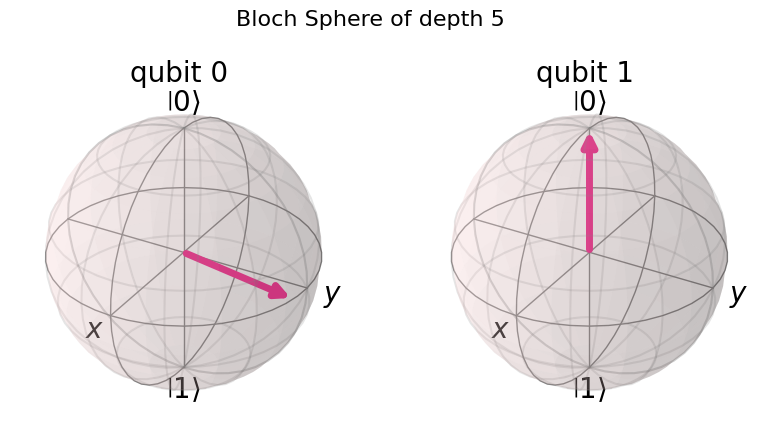

In [14]:
qc = QuantumCircuit(2)
for element in evaluated_circuit_list[3][0]:
    eval("qc" + element)

state = Statevector(qc)

plot_bloch_multivector(state,title="Bloch Sphere of depth 5")

Provided, this gives us the Bloch sphere depiction of depth 5

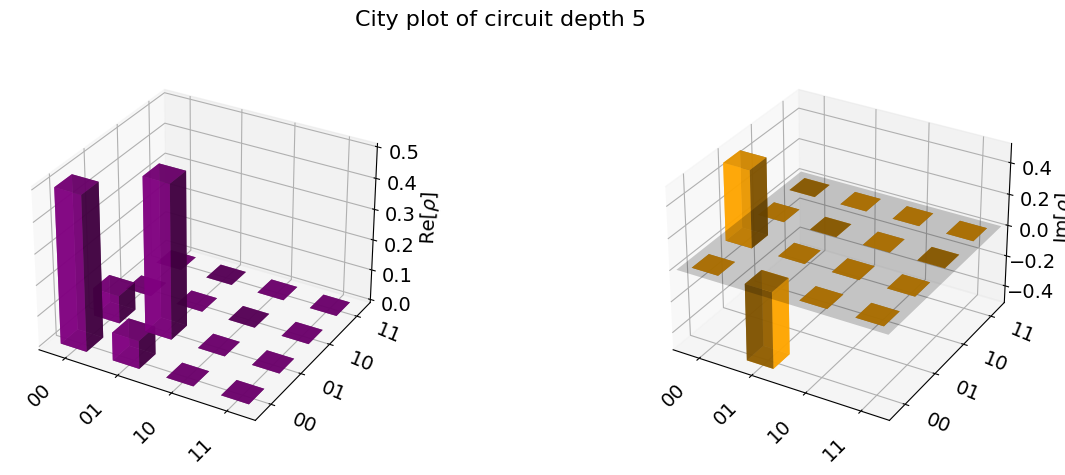

In [15]:
plot_state_city(state,alpha=0.8,title="City plot of circuit depth 5",color=["purple","orange"])

Which then gives us the city plot of depth 5

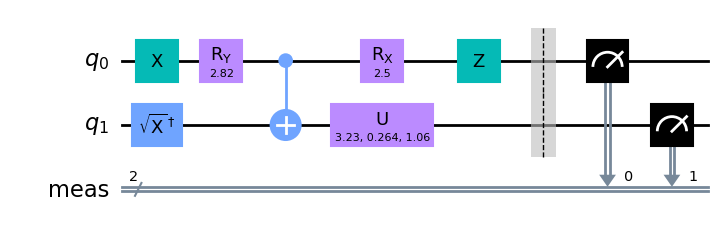

In [16]:
evaluated_circuit_list[4][1].draw(output="mpl")

This shows a random circuit with a depth of 7 and 2 qubits.

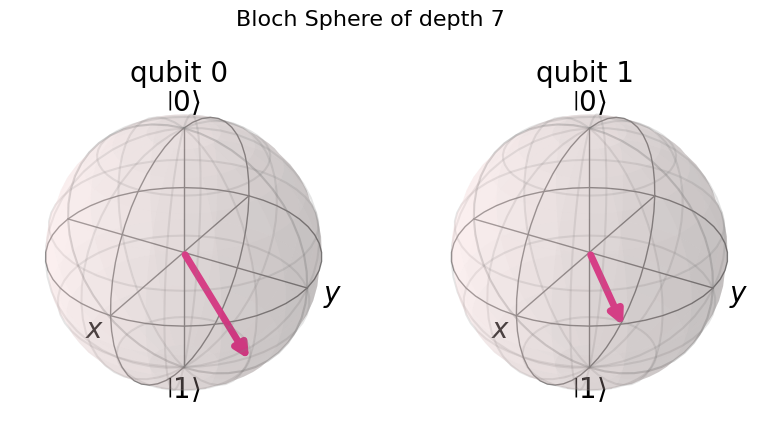

In [17]:
qc = QuantumCircuit(2)
for element in evaluated_circuit_list[4][0]:
    eval("qc" + element)

state = Statevector(qc)

plot_bloch_multivector(state,title="Bloch Sphere of depth 7")

Which then gives us the Bloch sphere diagram of depth 7

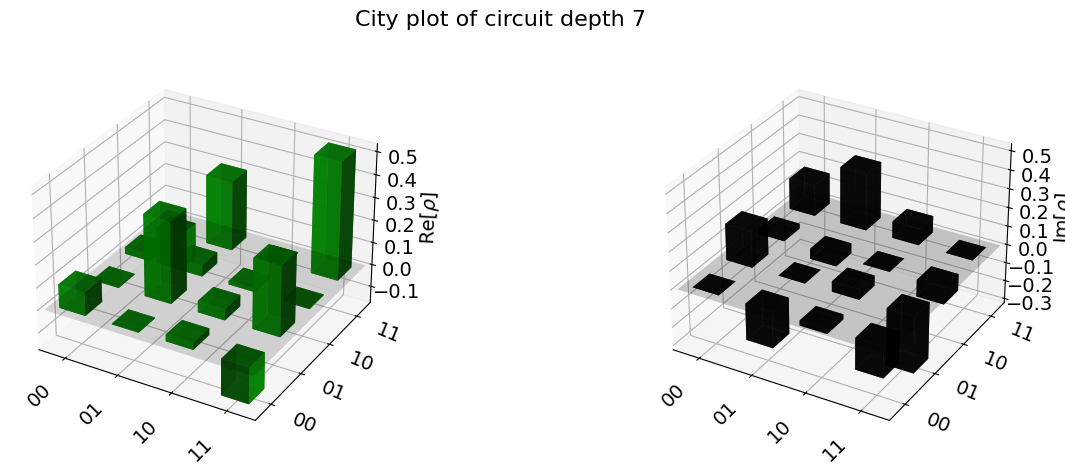

In [18]:
plot_state_city(state,alpha=0.8,title="City plot of circuit depth 7",color=["green","black"])

Which then gives the city plot of depth 7

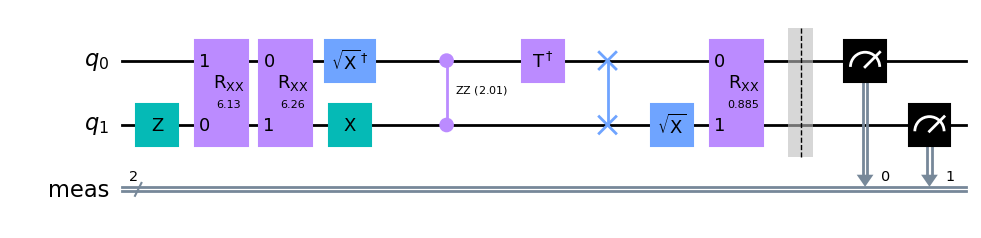

In [19]:
evaluated_circuit_list[5][1].draw(output="mpl")

This shows a random circuit with a depth of 10 and 2 qubits.

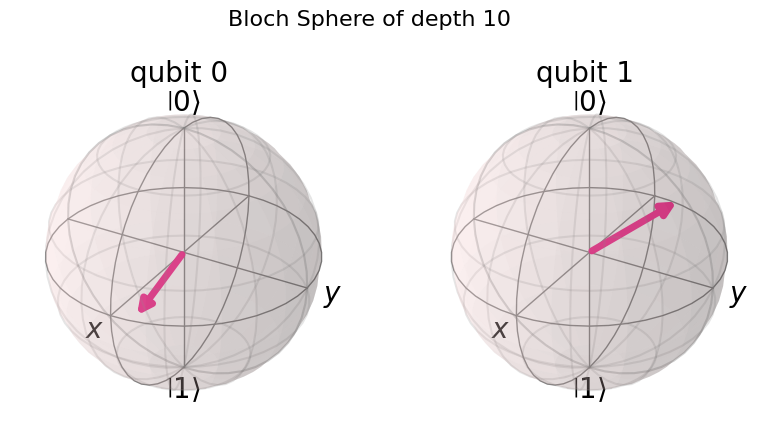

In [20]:
qc = QuantumCircuit(2)
for element in evaluated_circuit_list[5][0]:
    eval("qc" + element)

state = Statevector(qc)

plot_bloch_multivector(state,title="Bloch Sphere of depth 10")

This then leads to a Bloch sphere of a depth of 10

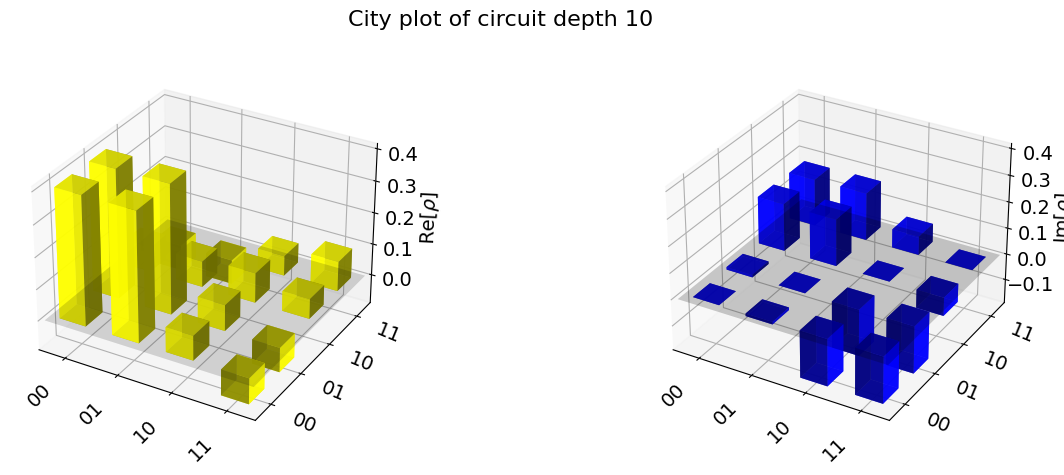

In [21]:
plot_state_city(state,alpha=0.8,title="City plot of circuit depth 10",color=["yellow","blue"])

This then gives us the city plot for a depth of 10.

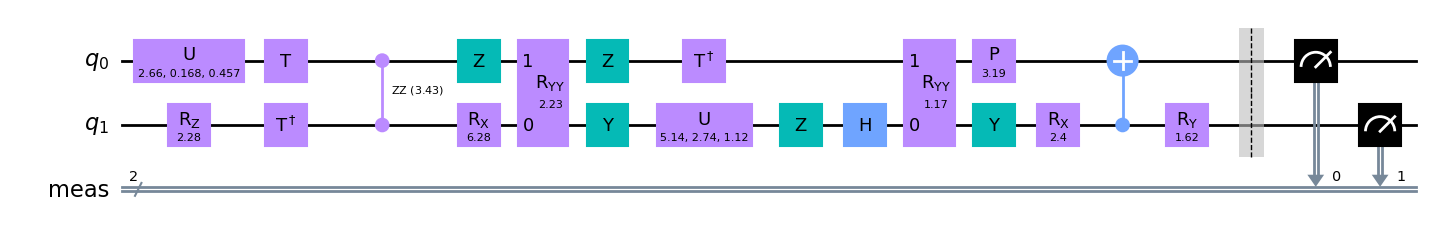

In [22]:
evaluated_circuit_list[6][1].draw(output="mpl")

This shows a random circuit with a depth of 20 and 2 qubits.

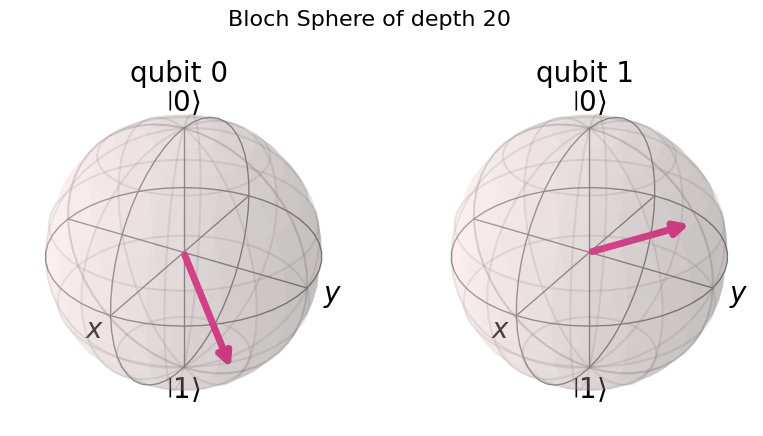

In [23]:
qc = QuantumCircuit(2)
for element in evaluated_circuit_list[6][0]:
    eval("qc" + element)

state = Statevector(qc)

plot_bloch_multivector(state,title="Bloch Sphere of depth 20")

Which gives a Bloch Sphere of depth 20.

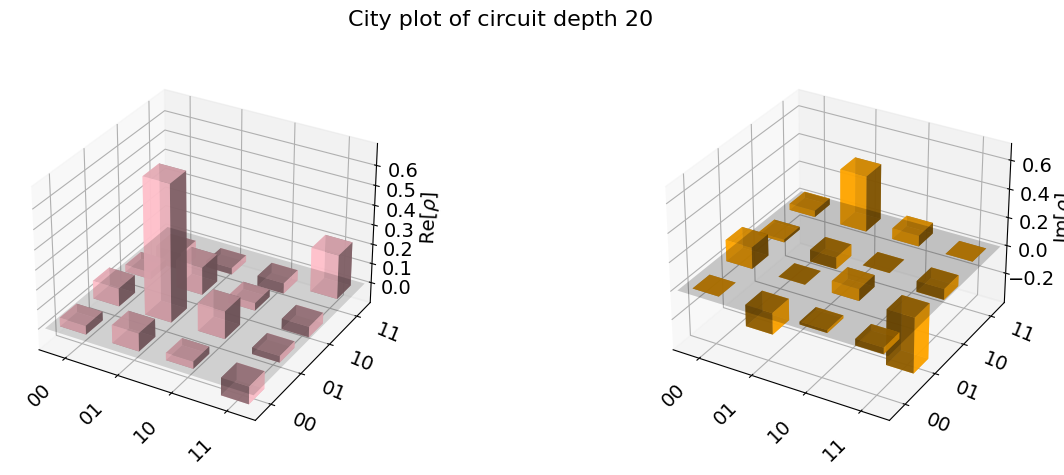

In [24]:
plot_state_city(state,alpha=0.8,title="City plot of circuit depth 20",color=["pink","orange"])

Giving a city plot of depth 20.

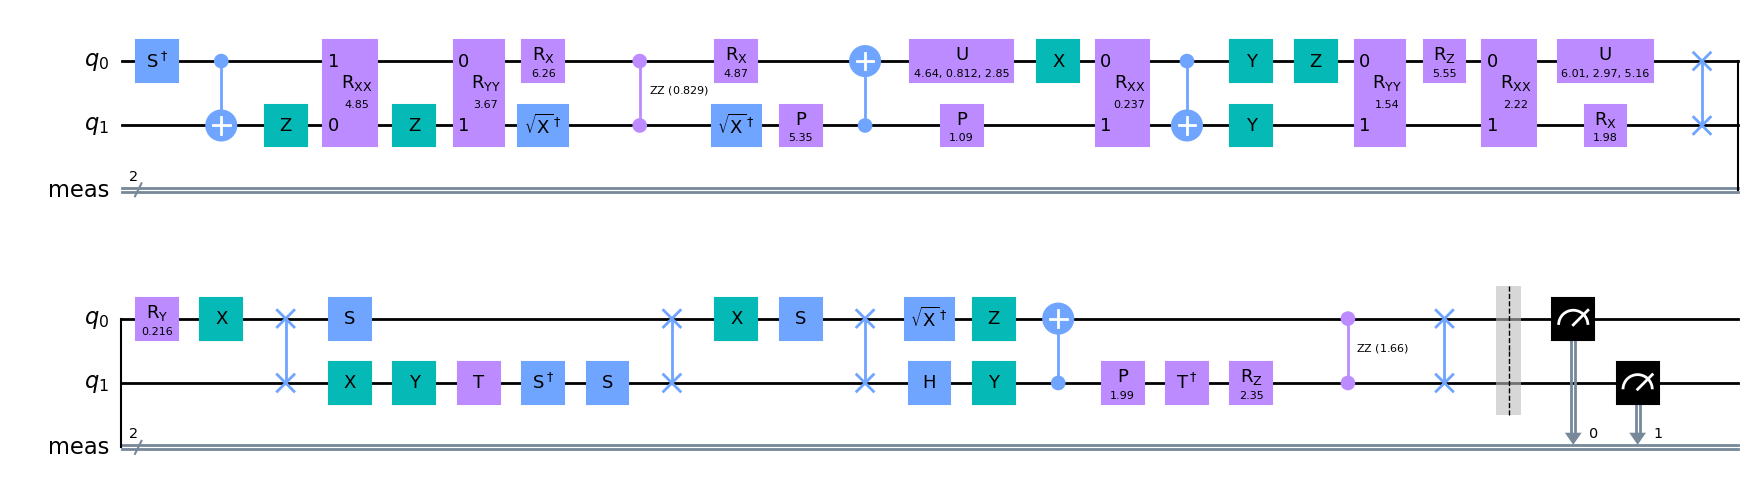

In [25]:
evaluated_circuit_list[7][1].draw(output="mpl")

This is a circuit with a depth of 50

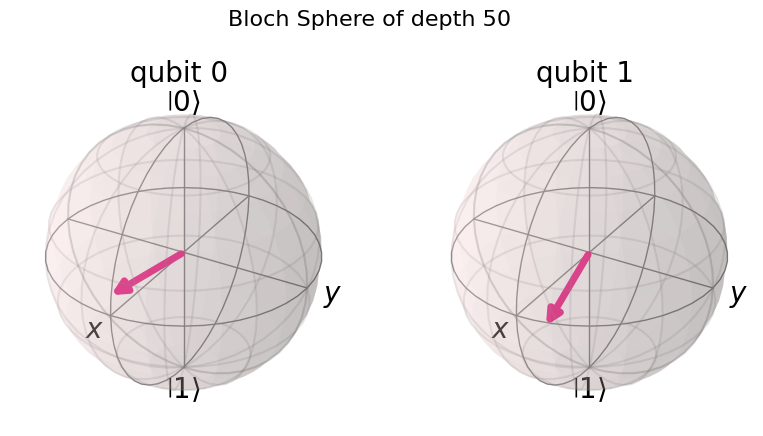

In [26]:
qc = QuantumCircuit(2)
for element in evaluated_circuit_list[7][0]:
    eval("qc" + element)

state = Statevector(qc)

plot_bloch_multivector(state,title="Bloch Sphere of depth 50")

Which also has a Bloch sphere of depth 50

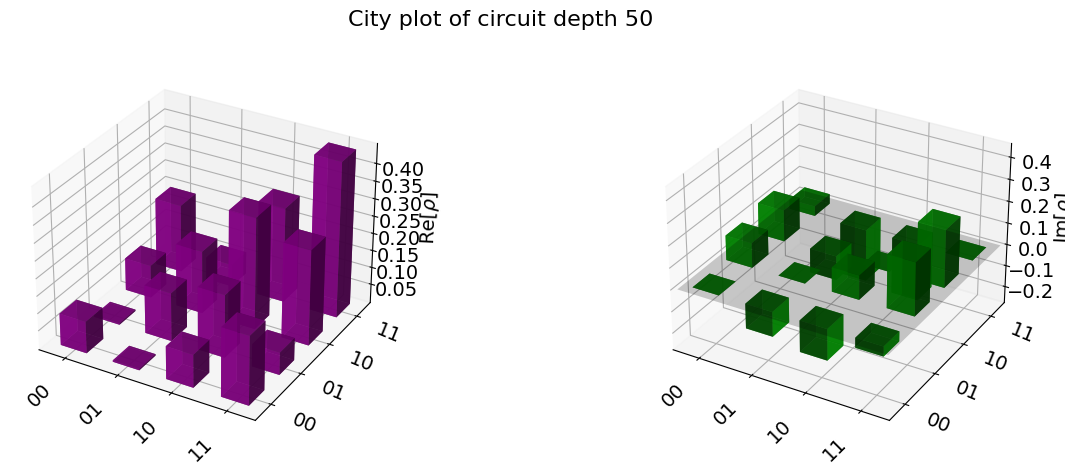

In [27]:
plot_state_city(state,alpha=0.8,title="City plot of circuit depth 50",color=["purple","green"])

This then gives us the city plot of depth 50.

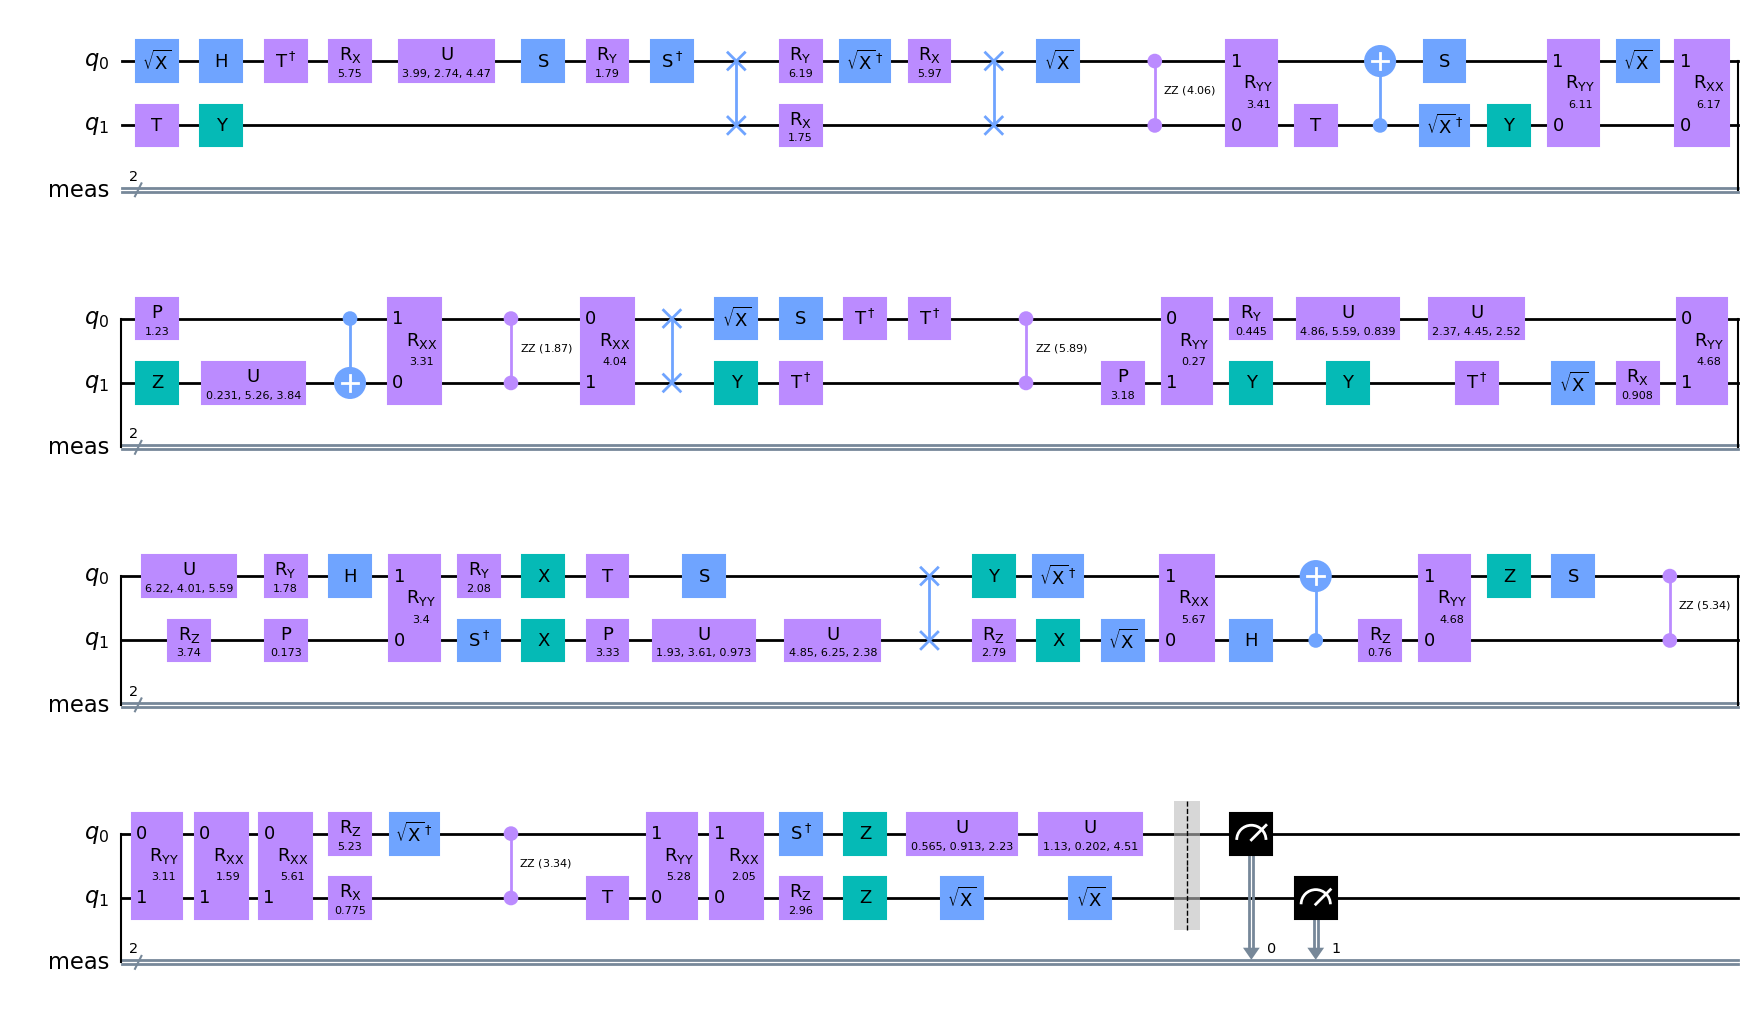

In [28]:
evaluated_circuit_list[8][1].draw(output="mpl")

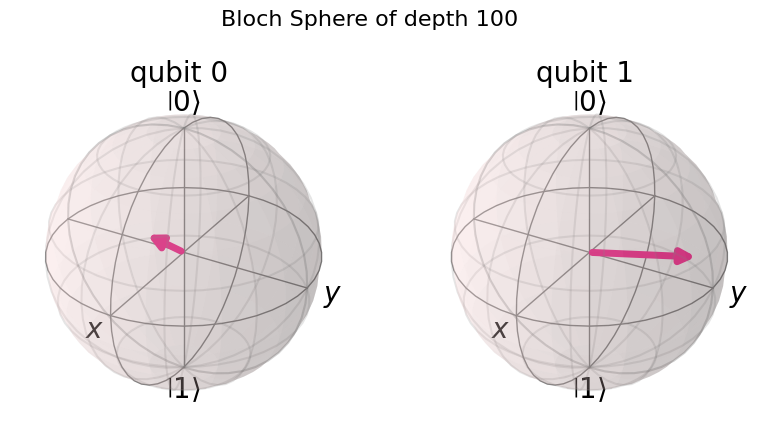

In [29]:
qc = QuantumCircuit(2)
for element in evaluated_circuit_list[8][0]:
    eval("qc" + element)

state = Statevector(qc)

plot_bloch_multivector(state,title="Bloch Sphere of depth 100")

Which then gives a Bloch sphere with the depth of 100.

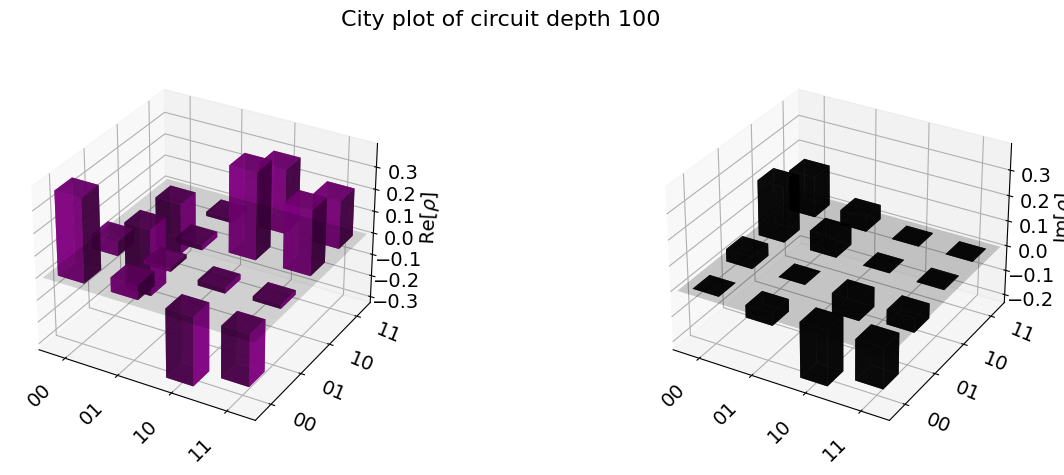

In [30]:
plot_state_city(state,alpha=0.8,title="City plot of circuit depth 100",color=["purple","black"])

This also gives the city plot with a depth of 100.

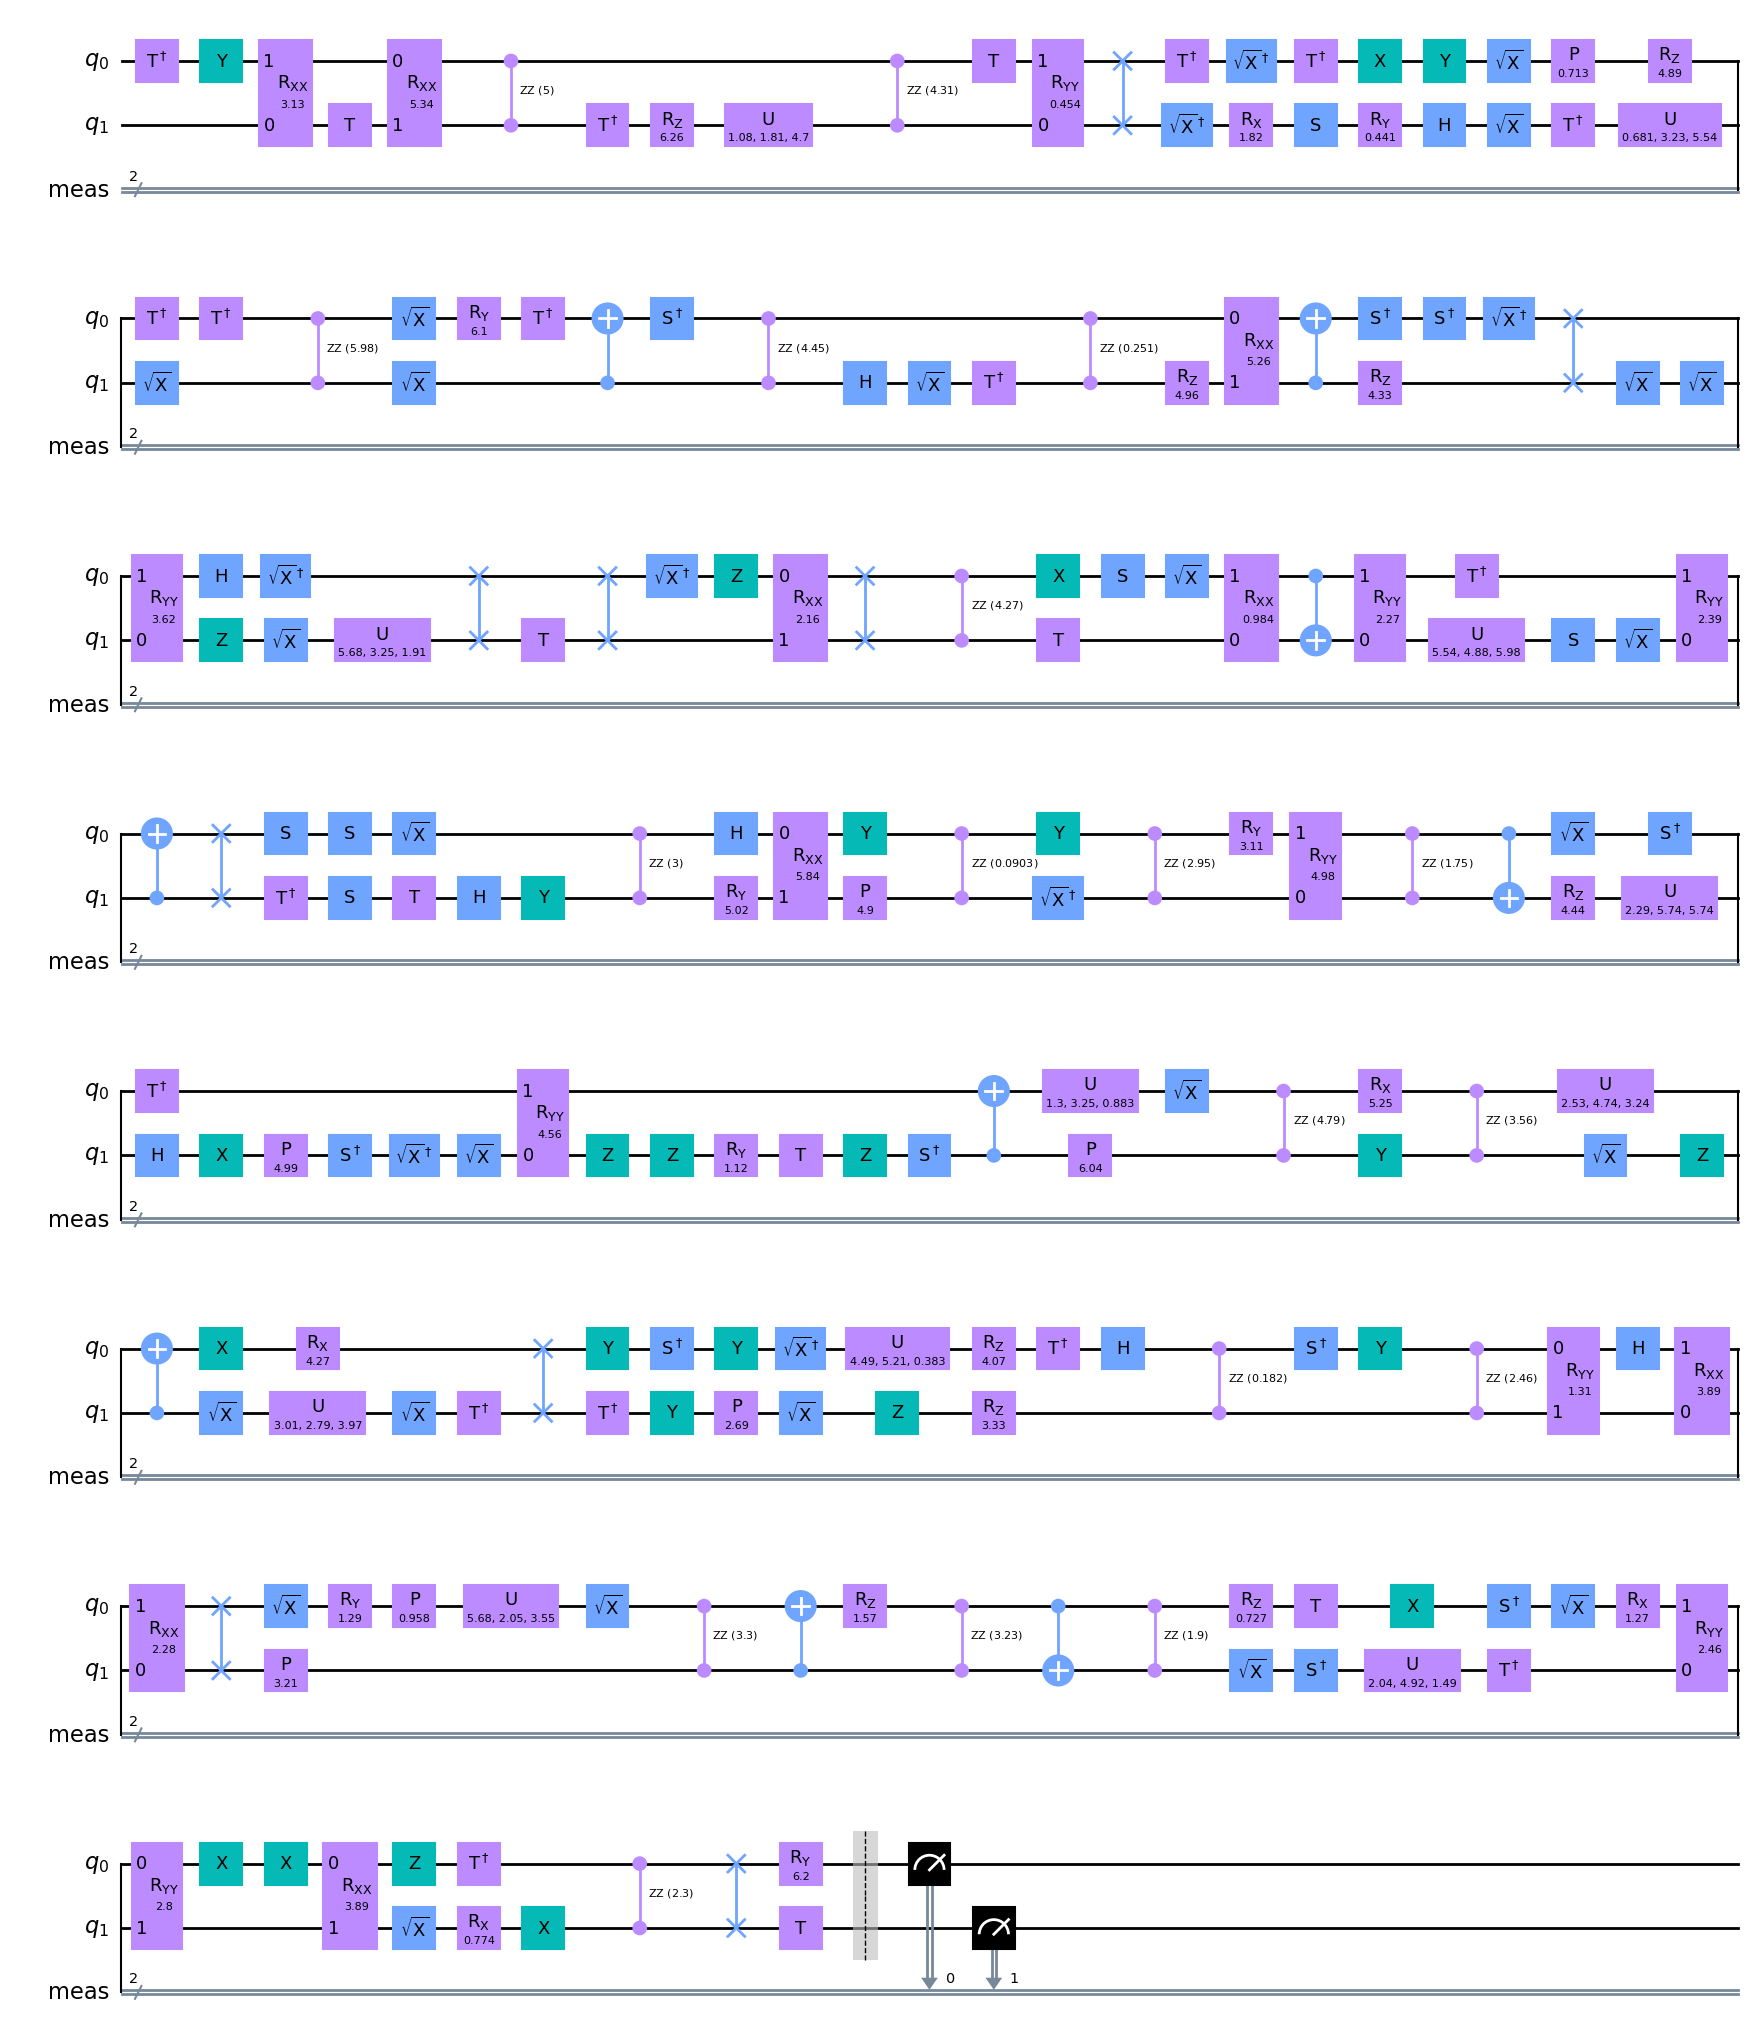

In [31]:
evaluated_circuit_list[9][1].draw(output="mpl")

This shows a random circuit with a depth of 200 and 2 qubits.

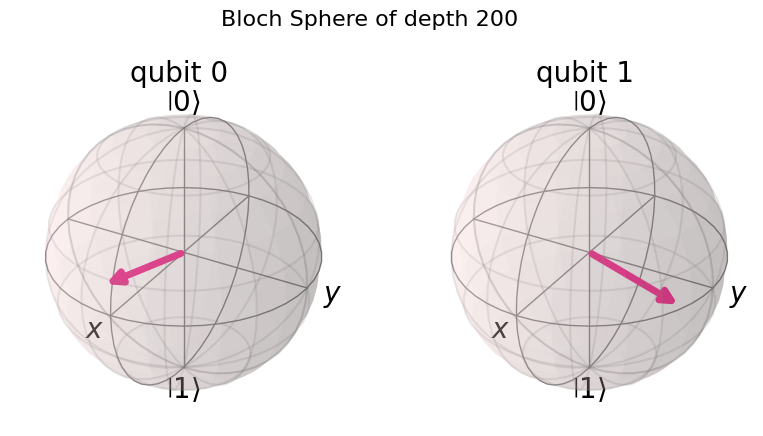

In [32]:
qc = QuantumCircuit(2)
for element in evaluated_circuit_list[9][0]:
    eval("qc" + element)

state = Statevector(qc)

plot_bloch_multivector(state,title="Bloch Sphere of depth 200")

Providing us with the final Bloch spheres with a depth of 200

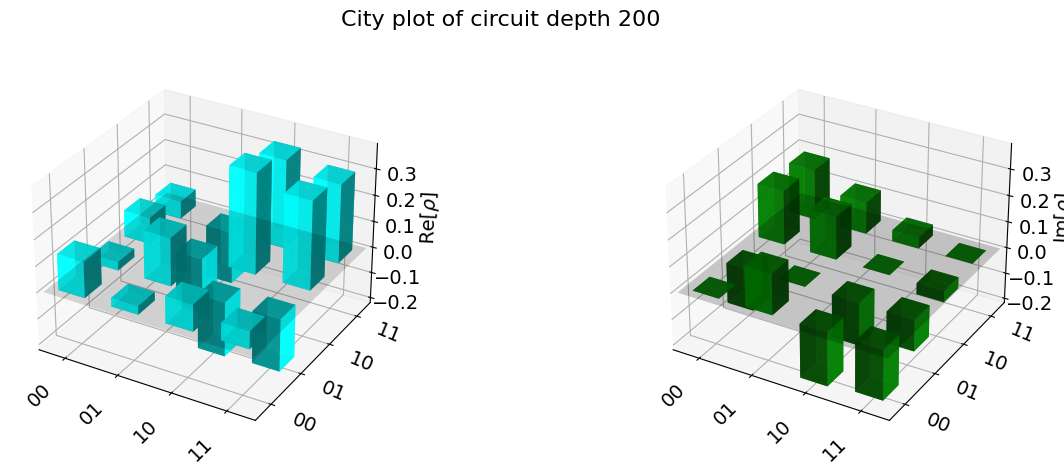

In [33]:
plot_state_city(state,alpha=0.8,title="City plot of circuit depth 200",color=["cyan","green"])

Which also finally gives us a diagram for the city plot of a depth of 200.

## Expected Value Function
This code defines two functions for simulating a quantum circuit and calculating the output state vector and qubit probabilities. The first function, gate_matrix(), takes a gate instruction as a string and returns the corresponding 4x4 transformation matrix that is applied to the current state vector of the qubits. The second function, statevector_output(), takes a list of gate instructions and applies them sequentially to the initial state vector, returning the resulting state vector, its complex conjugate, and the probability density vector for each possible qubit configuration.

The gate_matrix() function in this code defines the transformation matrices for a variety of quantum gates, including the Pauli X, Y, and Z gates, the Hadamard gate, and various rotation gates. These matrices are used to update the state vector of the qubits as they are passed through the circuit.

The statevector_output() function applies the gates in the circuit sequentially, using the gate matrices to update the state vector at each step. The resulting state vector represents the quantum state of the qubits after the circuit has been executed. The function then calculates the probability density vector for each possible qubit configuration by taking the product of each state vector coefficient with its complex conjugate. This vector represents the probability of measuring each possible qubit configuration when the qubits are measured in the standard basis.


In [35]:
from expected_value import statevector_output
probability_listing = []
statevector = []
conjugate_statevector = []
expect_prob, expect_sv, expect_conj_sv = statevector_output(evaluated_circuit_list[0][0])
for i in evaluated_circuit_list:
    expect_prob, expect_sv, expect_conj_sv = statevector_output(i[0])
    expect_outcome = [1024*x for x in expect_prob]
    probability_listing.append(expect_outcome)
    statevector.append(expect_sv)
    conjugate_statevector.append(expect_conj_sv)

## Job Request Function
The job request function takes a list of given quantum inputs and sends a request to IBM's Lima quantum computer to run qubits through the circuit and measure the output qubit states. The function returns a set of text files following the format job_id_strings_(depth).txt where (depth) is the depth used for the circuit. Each text file contains the first line which includes all of the gates with the next ten lines showing a set of 1024 trials outputting the number of times 00, 01, 10, and 11 as a dictionary.


In [36]:
from job_request import job_acquisition
for i in range(len(evaluated_circuit_list)):
    job_acquisition(evaluated_circuit_list[i][0], evaluated_circuit_list[i][1], 10)

configrc.store_credentials:WARNING:2023-03-30 22:34:05,753: Credentials already present. Set overwrite=True to overwrite.
configrc.store_credentials:WARNING:2023-03-30 22:34:08,593: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-03-30 22:34:08,818: Credentials are already in use. The existing account in the session will be replaced.
configrc.store_credentials:WARNING:2023-03-30 22:34:10,962: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-03-30 22:34:11,089: Credentials are already in use. The existing account in the session will be replaced.
configrc.store_credentials:WARNING:2023-03-30 22:34:13,890: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-03-30 22:34:14,391: Credentials are already in use. The existing account in the session will be replaced.
configrc.store_credentials:WARNING:2023-03-30 22:34:16,773: Credentials already 

In [37]:
total_output_data = []
measured_instances = []
file_names = ['job_id_strings_1.txt', 'job_id_strings_2.txt', 'job_id_strings_3.txt', 'job_id_strings_5.txt', 'job_id_strings_7.txt', 'job_id_strings_10.txt', 'job_id_strings_20.txt', 'job_id_strings_50.txt', 'job_id_strings_100.txt', 'job_id_strings_200.txt']
for instances in file_names:
    string = open(instances, 'r')
    lines = string.readlines()
    output_data_2 = []
    for i in lines:
        i.strip("\n")
        output_data_2.append(eval(i))
    string.close()
    total_output_data.append(output_data_2)

for depth_instances in total_output_data:
    measured_depth_list = []
    for i in range(10):
        sample_data = []
        depth_dictionary = depth_instances[i+1]
        if "00" in depth_dictionary:
            sample_data.append(depth_dictionary['00'])
        else:
            sample_data.append(0)
        if "01" in depth_dictionary:
            sample_data.append(depth_dictionary['01'])
        else:
            sample_data.append(0)
        if "10" in depth_dictionary:
            sample_data.append(depth_dictionary['10'])
        else:
            sample_data.append(0)
        if "11" in depth_dictionary:
            sample_data.append(depth_dictionary['11'])
        else:
            sample_data.append(0)
        measured_depth_list.append(sample_data)
    measured_instances.append(measured_depth_list)

## Chi-Squared Significance Test

The chi_squared function takes two input arguments: theory_val and experimental_val, which are lists of integers representing the expected and actual instances of IBM qubit configurations (00, 01, 10, 11) respectively. The function returns the Chi-squared value calculated between the expected and actual values of qubits. Chi-squared is a statistical measure of how well the observed data fits with the expected data, and it is commonly used in hypothesis testing.

The significance_statement function takes the Chi-squared value calculated by the chi_squared function as input, along with an optional significance level (default value is 0.05). The function returns a string indicating whether or not the Chi-squared value is statistically significant at the specified significance level. The significance level represents the level of confidence that the experimental and theoretical data are independent, and is commonly set to 0.05 or 0.01.

The function first defines a list of known Chi-squared values for different significance levels and degrees of freedom. It then iterates through the list to determine the closest Chi-squared value to the specified significance level. If the specified significance level is exactly equal to one of the values in the list, the corresponding Chi-squared value is used. If the specified significance level is not in the list, the function uses linear interpolation to estimate the Chi-squared value.

Finally, the function compares the calculated Chi-squared value to the estimated Chi-squared value and returns a string indicating whether or not the calculated value is statistically significant at the specified level. The string includes the calculated Chi-squared value rounded to three decimal places for reference.

In [38]:
from chi_squared_calc import chi_squared, significance_statement
significance_results = []
for i in range(10):
    significance_sub_results = []
    for j in range(10):
        chi_square_val = chi_squared(probability_listing[i], measured_instances[i][j])
        sig_statement = significance_statement(chi_square_val)
        significance_sub_results.append((chi_square_val, sig_statement))
    significance_results.append(significance_sub_results)

## Results and Conclusion

After running the simulation, we decided to compare the data points to see how significant our expected values were compared to our recorded values after every simulation. We decided to compare the two to see how much the expected results vary from the measured results. In this instance we decided to choose the seventh test for each of the depth cases

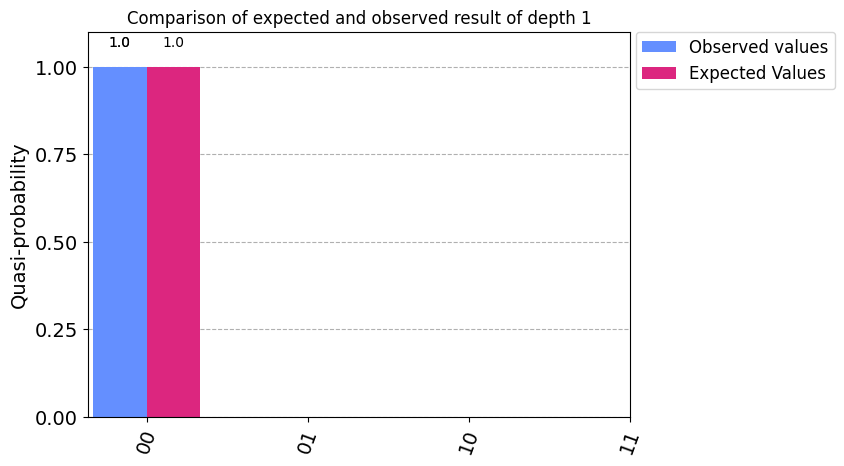

In [57]:
probability_list_dict = []
for i in range(10):
    dict = {}
    dict["00"] = probability_listing[i][0]
    dict["01"] = probability_listing[i][1]
    dict["10"] = probability_listing[i][2]
    dict["11"] = probability_listing[i][3]
    probability_list_dict.append(dict)

plot_histogram([total_output_data[0][7],probability_list_dict[0]],title="Comparison of expected and observed result of depth 1",legend=["Observed values","Expected Values"])

In [41]:
print(significance_results[0][7][1])

The results are not statisically significant


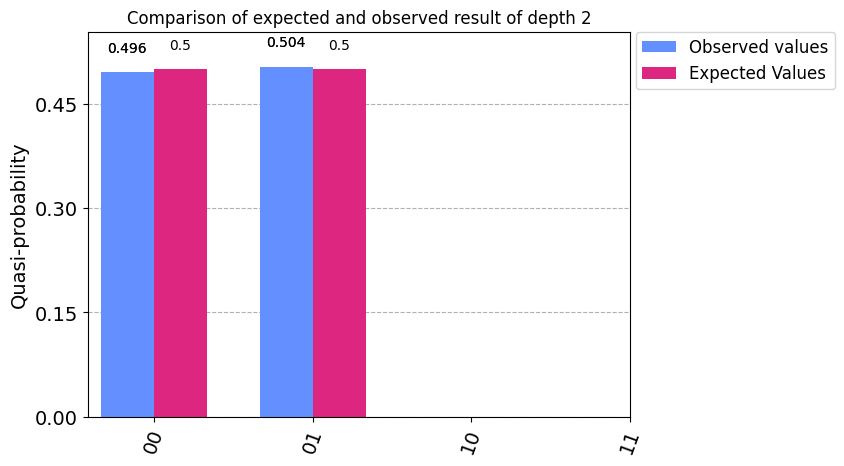

In [58]:
plot_histogram([total_output_data[1][7],probability_list_dict[1]],title="Comparison of expected and observed result of depth 2", legend=["Observed values","Expected Values"])

In [43]:
print(significance_results[1][7][1])

The results are not statisically significant


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


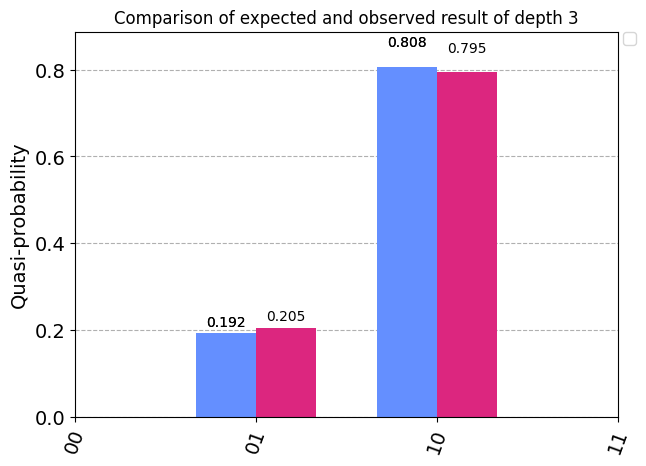

In [59]:
plot_histogram([total_output_data[2][7],probability_list_dict[2]],title="Comparison of expected and observed result of depth 3", legend=["Observed values","Expected Values"])

In [60]:
print(significance_results[2][7][1])

The results are not statisically significant


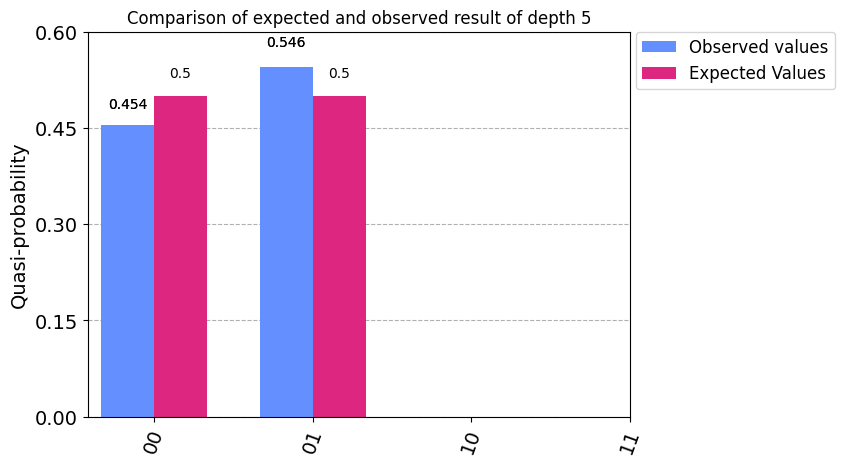

In [61]:
plot_histogram([total_output_data[3][7],probability_list_dict[3]],title="Comparison of expected and observed result of depth 5", legend=["Observed values","Expected Values"])

In [62]:
print(significance_results[3][7][1])

The results are not statisically significant


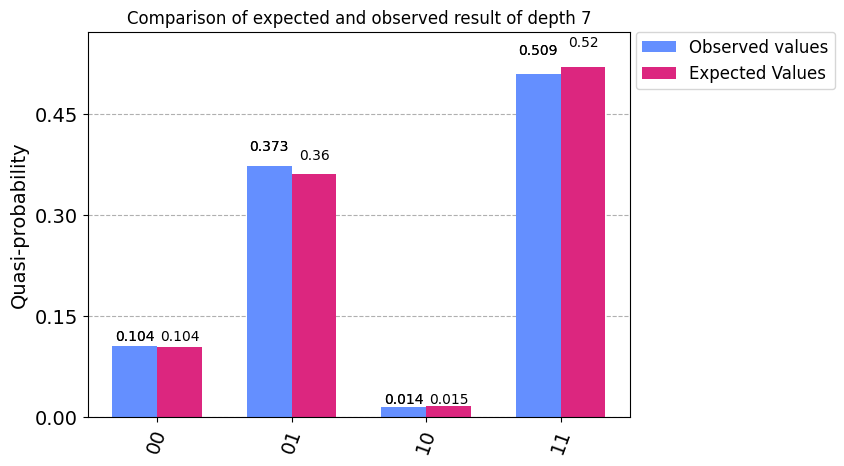

In [63]:
plot_histogram([total_output_data[4][7],probability_list_dict[4]],title="Comparison of expected and observed result of depth 7", legend=["Observed values","Expected Values"])

In [64]:
print(significance_results[4][7][1])

The results are not statisically significant


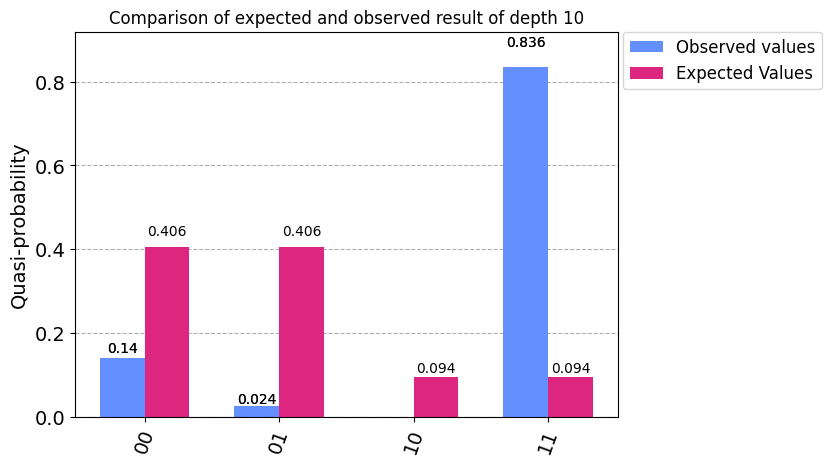

In [65]:
plot_histogram([total_output_data[5][7],probability_list_dict[5]],title="Comparison of expected and observed result of depth 10", legend=["Observed values","Expected Values"])

In [66]:
print(significance_results[5][7][1])

The results are statisically significant


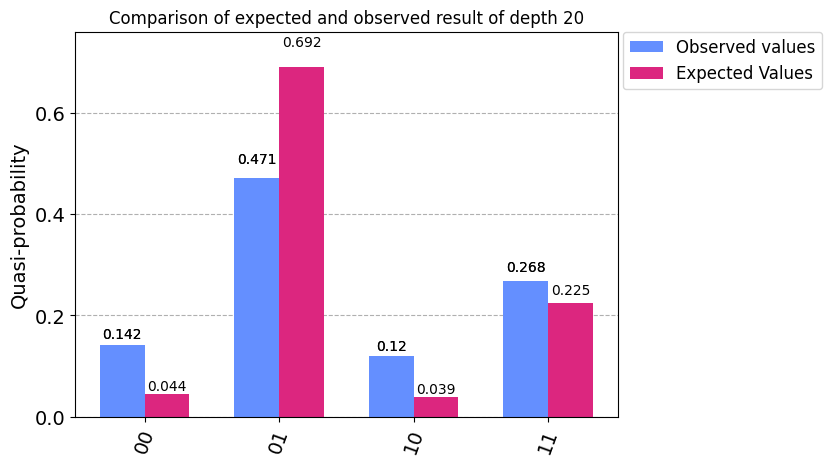

In [67]:
plot_histogram([total_output_data[6][7],probability_list_dict[6]],title="Comparison of expected and observed result of depth 20", legend=["Observed values","Expected Values"])

In [68]:
print(significance_results[6][7][1])

The results are statisically significant


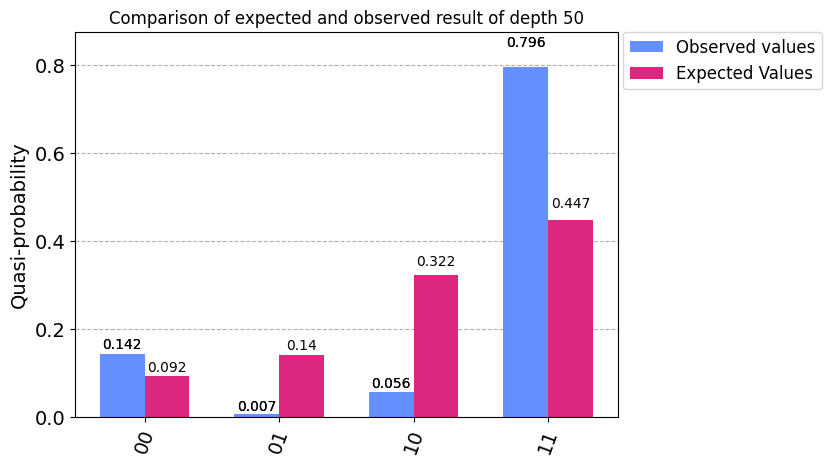

In [69]:
plot_histogram([total_output_data[7][7],probability_list_dict[7]],title="Comparison of expected and observed result of depth 50", legend=["Observed values","Expected Values"])

In [70]:
print(significance_results[7][7][1])

The results are statisically significant


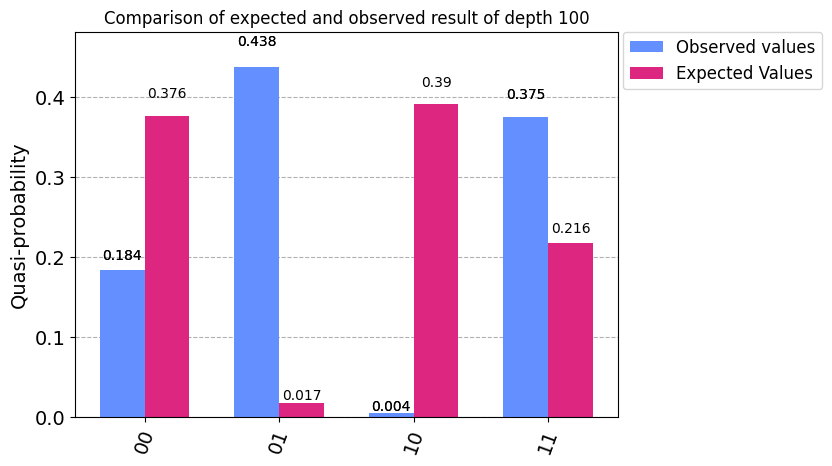

In [71]:
plot_histogram([total_output_data[8][7],probability_list_dict[8]],title="Comparison of expected and observed result of depth 100", legend=["Observed values","Expected Values"])

In [72]:
print(significance_results[8][7][1])

The results are statisically significant


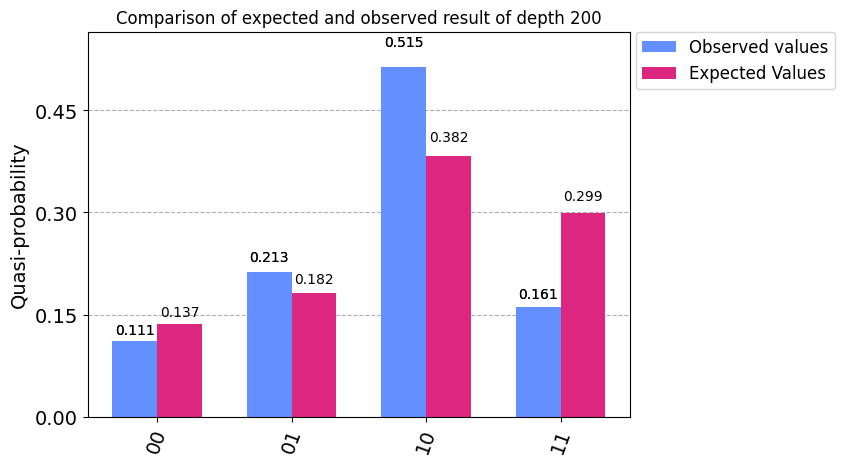

In [73]:
plot_histogram([total_output_data[9][7],probability_list_dict[9]],title="Comparison of expected and observed result of depth 200", legend=["Observed values","Expected Values"])

In [74]:
print(significance_results[9][7][1])

The results are statisically significant


## Conclusion

As you can see, the results of our random circuits does show that quantum computing algorithms do tend to go towards the expected results. However, this is only to a certain extent. For example, as soon as the circuit depth reaches approximately 50 gates, the amount of statisticaly variation becomes significantly high. This is likely due to more noise that is encounter throughout the circuit as more gates implies more noise that the data will face. Consider that some algorithms, such as finding the ground state of atoms to understand more about the molecular properties of a specific chemical, have to go through more than 50 gates in order for the algorithm to work properly. Additionally, there is no current method of error correction for any quantum computer. If we would like to be confident with the data that we get in our quantum circuit, certain measures of error correction, such as having better measuring tools or to have error correction methods, must be implemented in quantum software. Also consider that these quantum simulations are based off of a two qubit simulation when most algorithms typically use more than two qubits. The more qubits there are, the more statistical parameters we are to encounter, and the more significant our data will be. However, quantum computing is still a new and developing field which means that improvements will soon be made to make quantum algorithms more accurate.